In [1]:
import pandas as pd

In [2]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import pymupdf

In [3]:
def get_text_with_links(document):
    result_text = ""
    
    for page_num in range(len(document)):
        page = document.load_page(page_num)

        # Получаем слова и их координаты
        words = page.get_text("words")
        links = page.get_links()

        # Временный словарь для отслеживания последнего индекса слова для каждого URL
        last_occurrence_with_url = {}

        wc_map = {tuple(word[:4]): word[4] for word in words}
        
        for link in links:
            link_rect = pymupdf.Rect(link["from"])
            uri = link.get('uri', 'Нет ссылки')
            
            for i, word in enumerate(words):
                text = word[4]   # текст слова
                word_rect = pymupdf.Rect(word[:4])

                # Проверка на пересечение координат
                if word_rect.intersects(link_rect):
                    last_occurrence_with_url[uri] = (i, tuple(word[:4]))

        # Заменяем текст в конечном словаре ссылками на последних вхождениях
        for uri, (index, rect) in last_occurrence_with_url.items():
            wc_map[rect] = f'{wc_map[rect]}:"{uri}"'

        # Сортировка слов по их координатам для правильного порядка
        sorted_words = sorted(wc_map.items(), key=lambda x: (x[0][1], x[0][0]))

        for item in sorted_words:
            result_text += item[1] + " "
    
    return result_text.strip()  # добавляем strip для удаления лишних пробелов в конце

In [4]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"]="expandable_segments:True"

In [5]:
# def average_pool(last_hidden_states: Tensor,
#                  attention_mask: Tensor) -> Tensor:
#     last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
#     return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

# tokenizer = AutoTokenizer.from_pretrained('Alibaba-NLP/gte-Qwen2-1.5B-instruct', trust_remote_code=True, device_map="cuda:0")
# model = AutoModel.from_pretrained('Alibaba-NLP/gte-Qwen2-1.5B-instruct', trust_remote_code=True, device_map="cuda:0")

In [6]:
df = pd.read_csv('/root/docker_llama/interns_preprocessed_multiclass/interns_preprocessed_multiclass.csv', encoding='utf-8').dropna().reset_index(drop=True)

<Axes: ylabel='Frequency'>

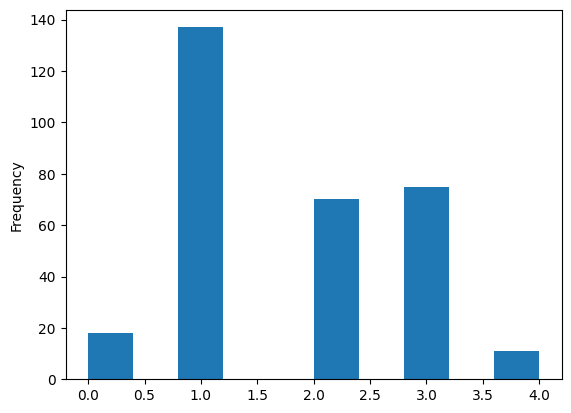

In [7]:
df['Hire status'].plot(kind='hist')

In [8]:
df['text']=None
df['embedding']=None

In [9]:
df['Резюме'] = df['Резюме'].apply(lambda x: '/root/docker_llama/'+x)

In [11]:
# def get_detailed_instruct(task_description: str, query: str) -> str:
#     return f'Instruct: {task_description}\nQuery: {query}'

# for i, pdf_file in enumerate(tqdm(df['Резюме'])):
#     pdf_file = pdf_file.replace('\\', '/')
#     #print(pdf_file)
#     try:
#         with pymupdf.open(pdf_file) as doc:
#             text = get_text_with_links(doc)
#     except:
#         print('битый файл')
#         continue
    
#     batch_dict = tokenizer(get_detailed_instruct("Оцни пройдет ли кандидат первый этап собеседования, состоящий из 2 leetcode medium задач, задачи и вопросов по SQL, вопросам по статистике, основам ML.\nДай кандидату один из 5 классов: strong no hire (0), no hire (1), week hire (2), hire (4), strong hire (5)",text), max_length=1024*4, padding=True, truncation=True, return_tensors='pt').to('cuda')
#     embeddings = average_pool(model(**batch_dict).last_hidden_state, batch_dict['attention_mask']).to('cpu')
#     df.loc[i, ['text']] = [text]
#     df.loc[i, ['embedding']] = [embeddings.tolist()]

#     del batch_dict
#     del embeddings
    

In [12]:
# df['label'] = df['Hire status']

In [13]:
# df = df.dropna().reset_index(drop=True)

In [14]:
# df['0embedding'] = df['embedding'].apply(lambda x: x[0])

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
#df.to_csv('qwen_embed_df.csv', index=False)

In [47]:
df = pd.read_csv('qwen_embed_df.csv', encoding='utf-8')

In [48]:
import ast

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


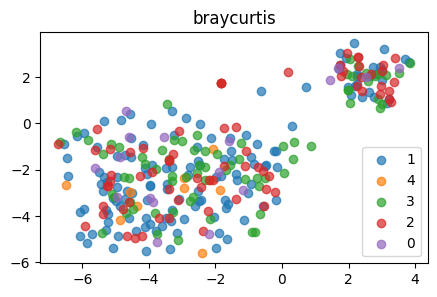

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


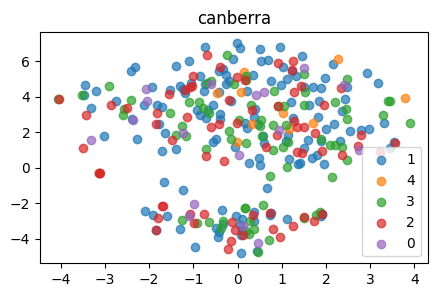

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


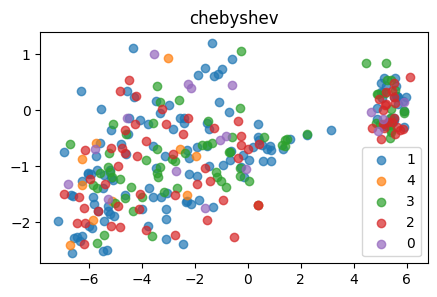

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


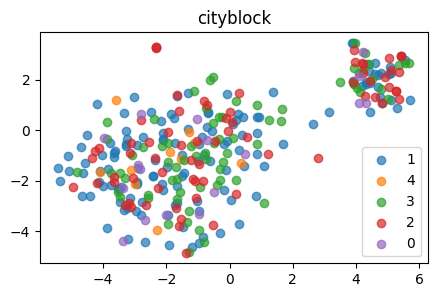

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


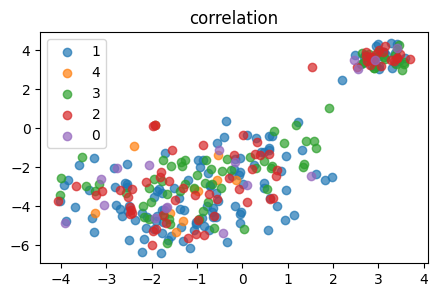

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


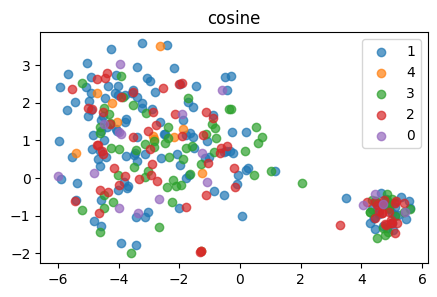

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


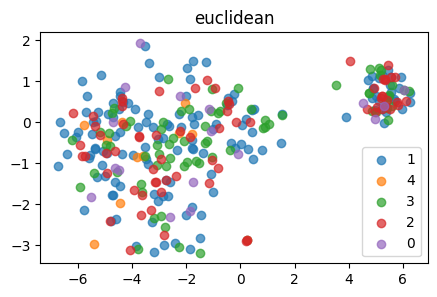

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


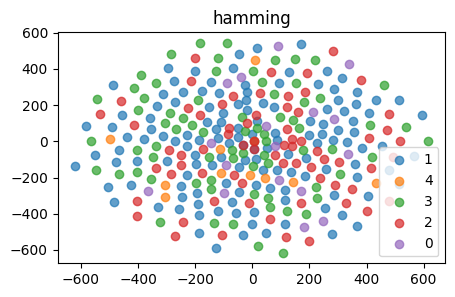

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


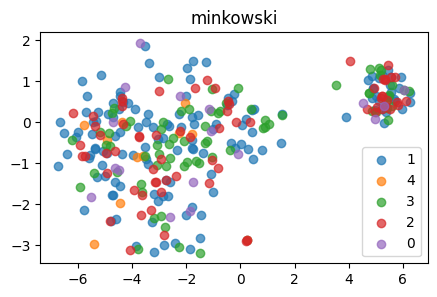

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


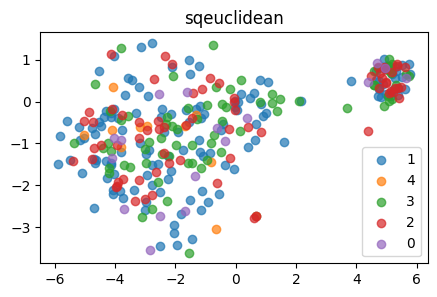

In [59]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['label'] = df['label']
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    fig, ax = plt.subplots(figsize=(5, 3))

    for label in embeddingsdf['label'].unique():
        subset = embeddingsdf[embeddingsdf['label'] == label]
        ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
    
    plt.title(f'{curmetric}')
    plt.legend()  # Show the legend with labels
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


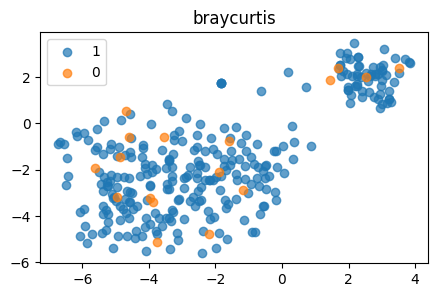

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


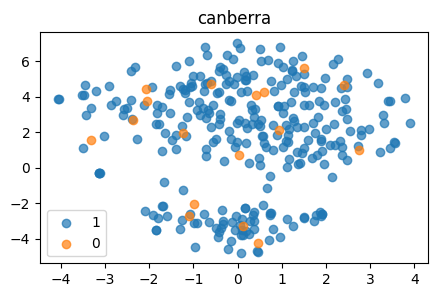

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


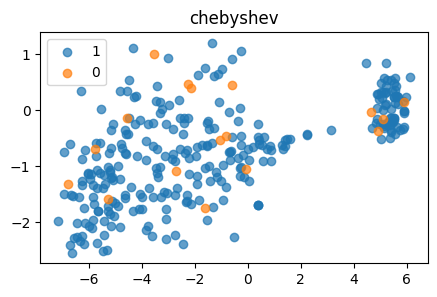

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


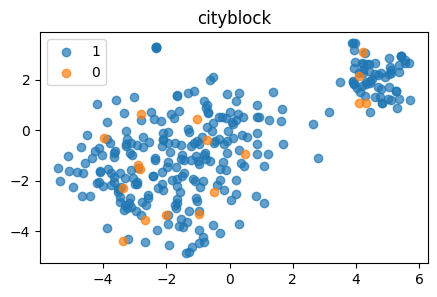

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


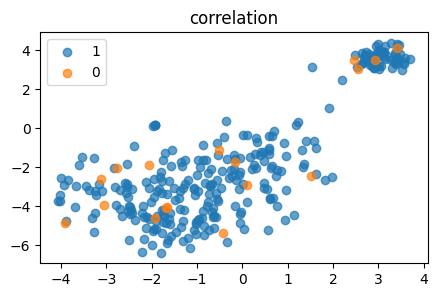

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


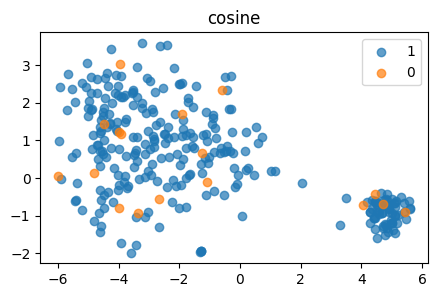

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


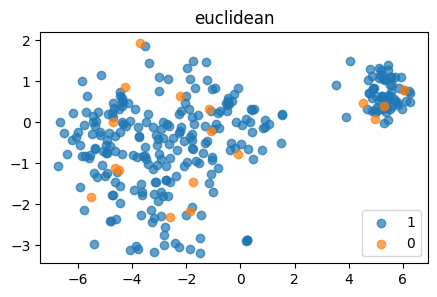

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


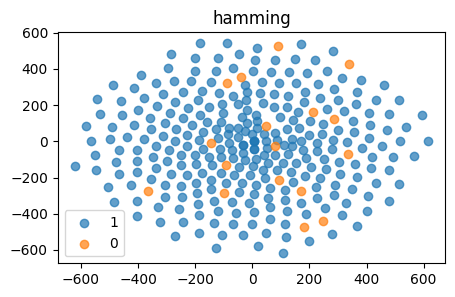

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


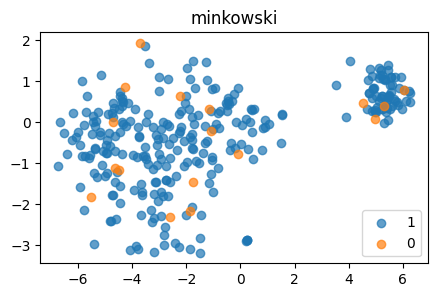

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


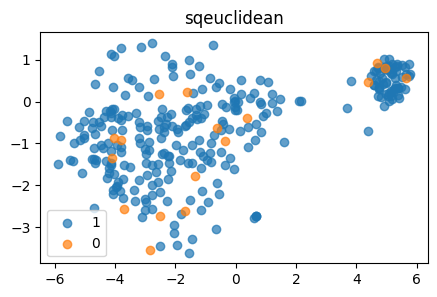

In [60]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['label'] = [0 if i<1 else 1 for i in df['label']]
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    fig, ax = plt.subplots(figsize=(5, 3))

    for label in embeddingsdf['label'].unique():
        subset = embeddingsdf[embeddingsdf['label'] == label]
        ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
    
    plt.title(f'{curmetric}')
    plt.legend()  # Show the legend with labels
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


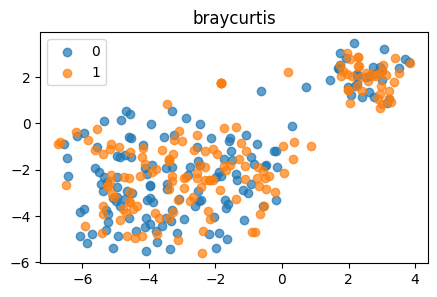

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


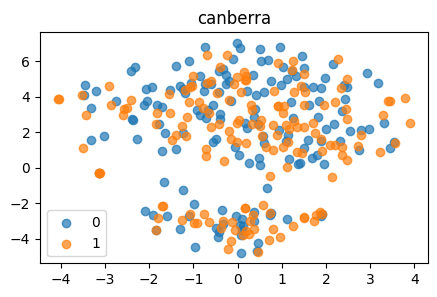

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


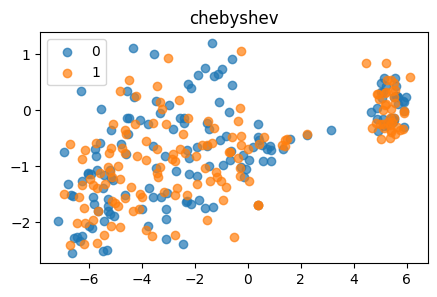

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


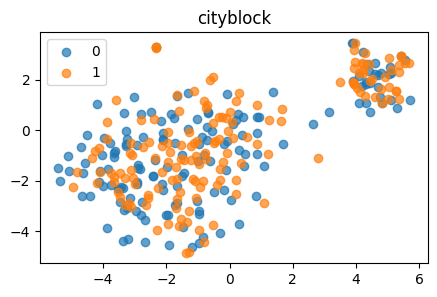

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


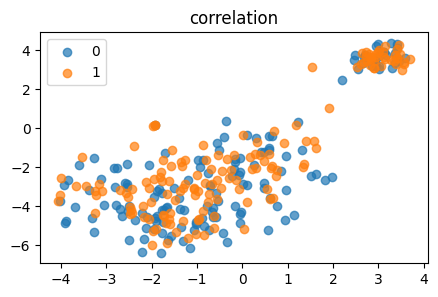

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


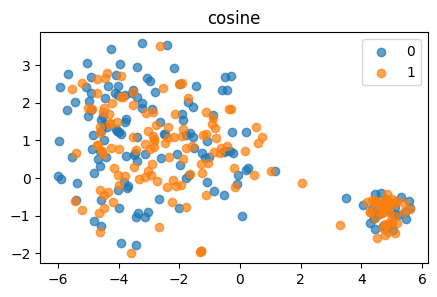

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


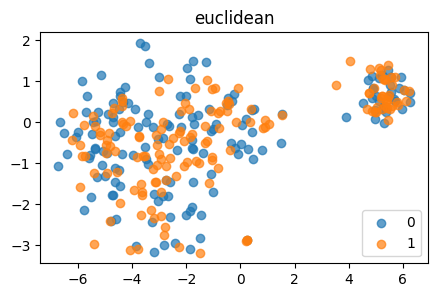

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


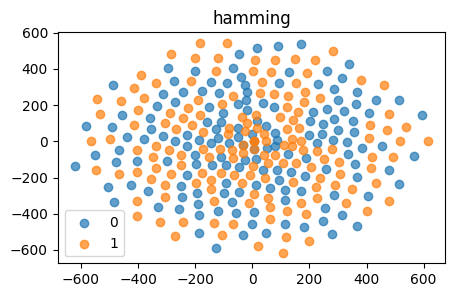

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


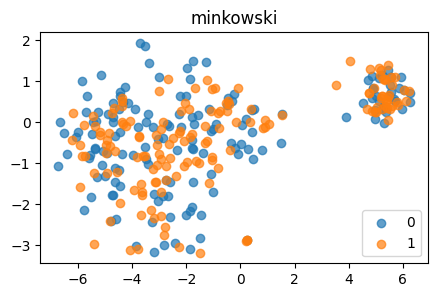

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


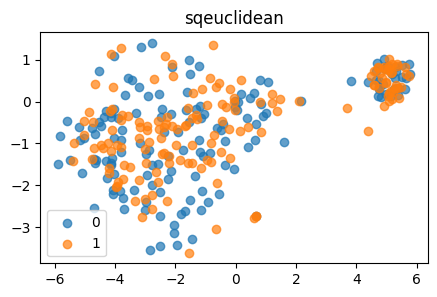

In [61]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['label'] = [0 if i<2 else 1 for i in df['label']]
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    fig, ax = plt.subplots(figsize=(5, 3))

    for label in embeddingsdf['label'].unique():
        subset = embeddingsdf[embeddingsdf['label'] == label]
        ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
    
    plt.title(f'{curmetric}')
    plt.legend()  # Show the legend with labels
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


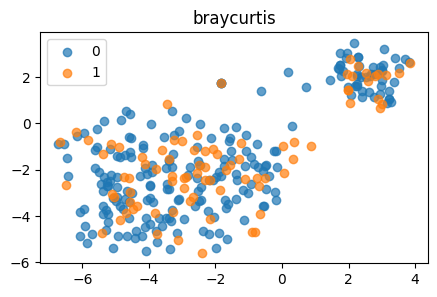

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


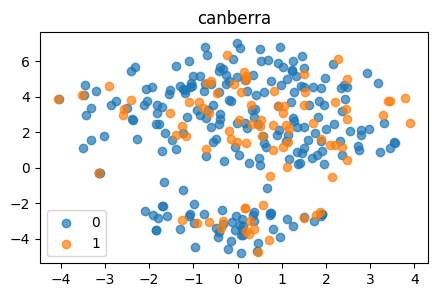

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


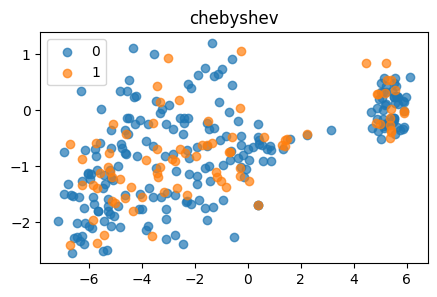

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


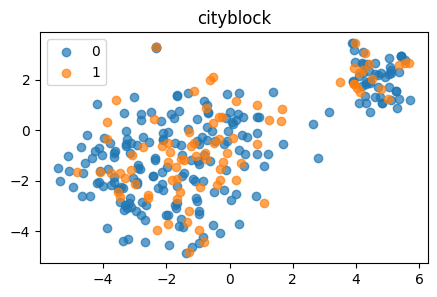

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


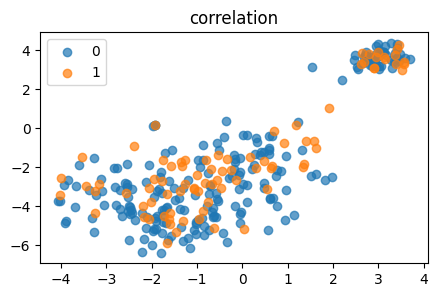

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


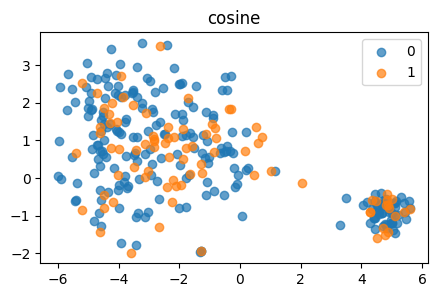

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


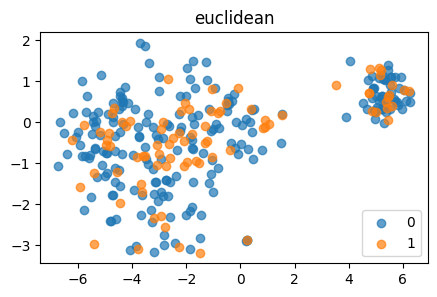

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


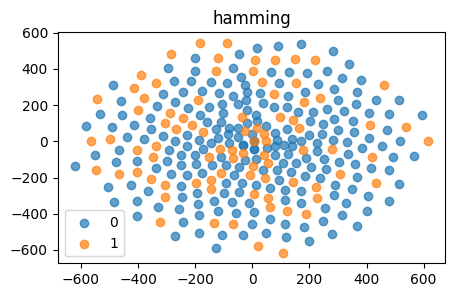

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


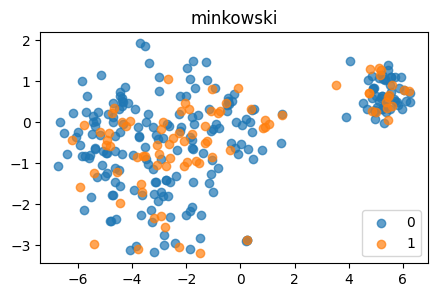

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


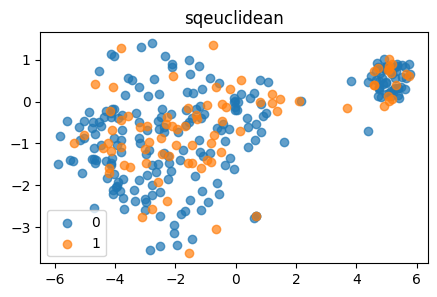

In [62]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['label'] = [0 if i<3 else 1 for i in df['label']]
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    fig, ax = plt.subplots(figsize=(5, 3))

    for label in embeddingsdf['label'].unique():
        subset = embeddingsdf[embeddingsdf['label'] == label]
        ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
    
    plt.title(f'{curmetric}')
    plt.legend()  # Show the legend with labels
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


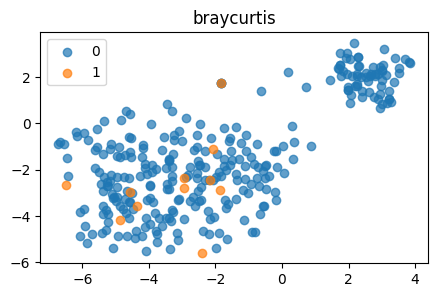

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


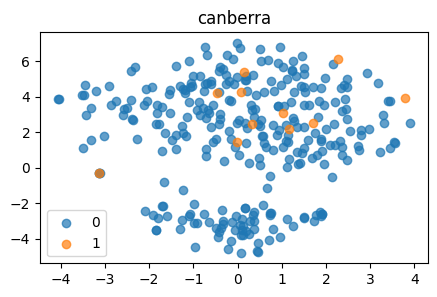

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


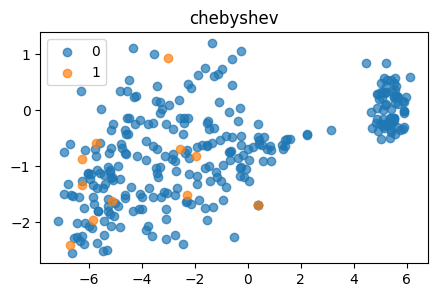

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


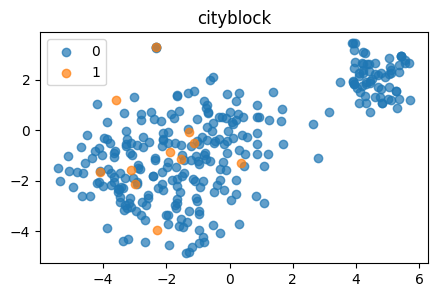

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


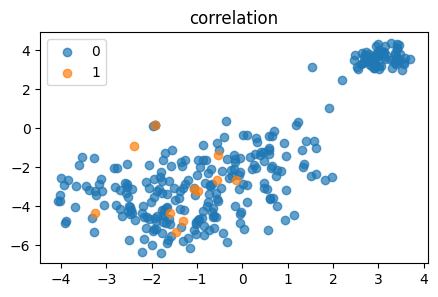

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


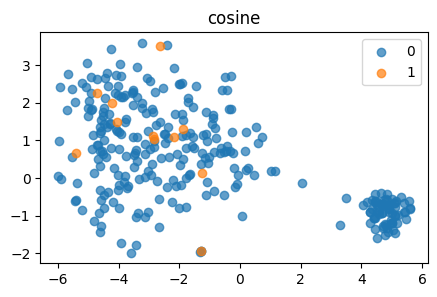

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


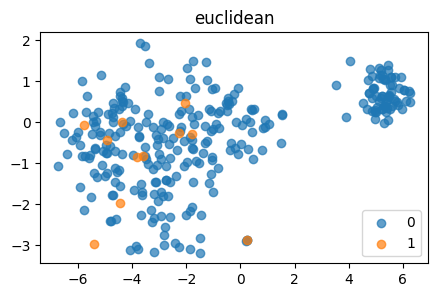

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


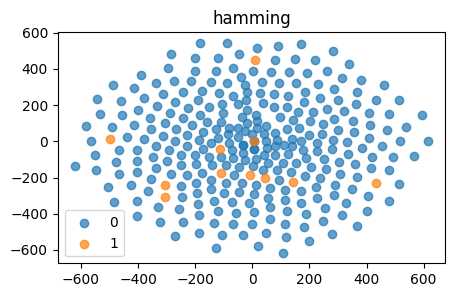

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


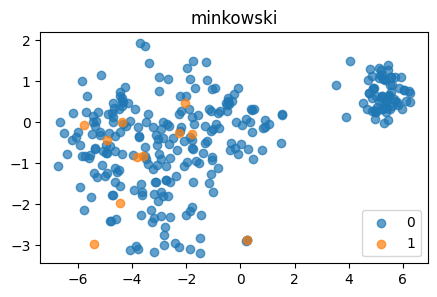

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


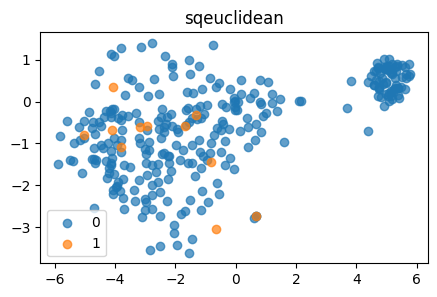

In [63]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['label'] = [0 if i<4 else 1 for i in df['label']]
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    fig, ax = plt.subplots(figsize=(5, 3))

    for label in embeddingsdf['label'].unique():
        subset = embeddingsdf[embeddingsdf['label'] == label]
        ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
    
    plt.title(f'{curmetric}')
    plt.legend()  # Show the legend with labels
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


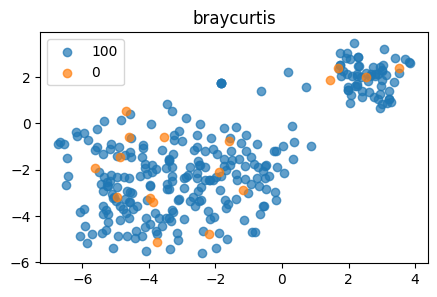

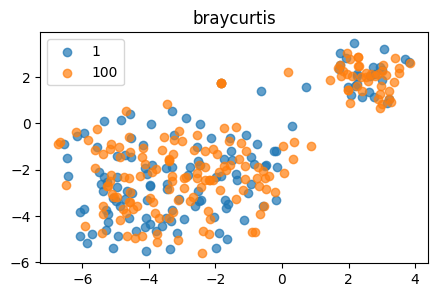

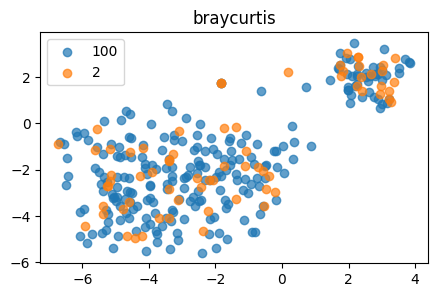

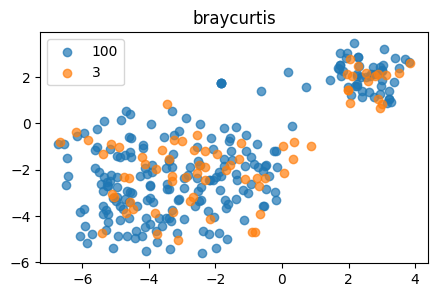

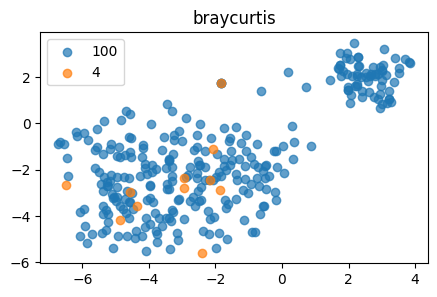

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


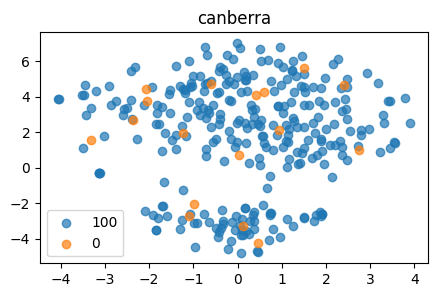

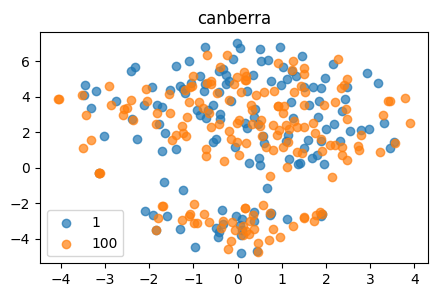

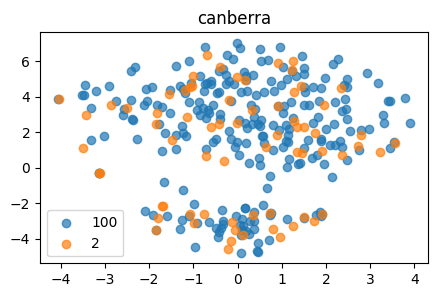

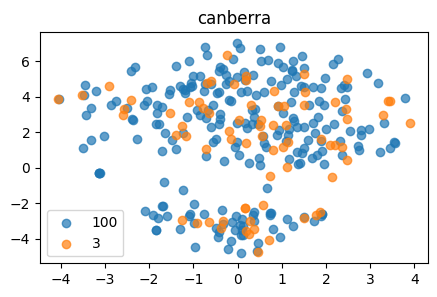

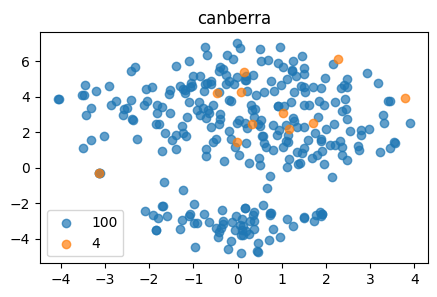

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


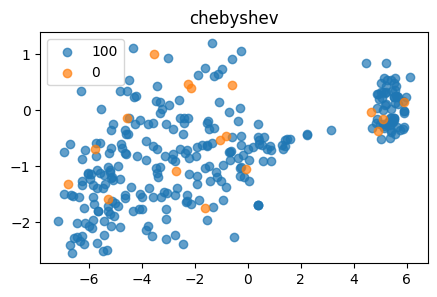

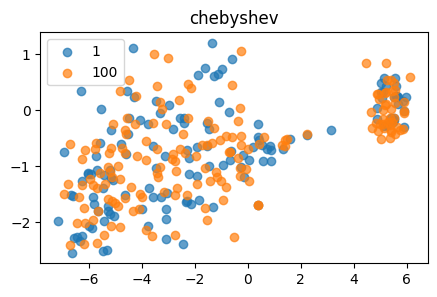

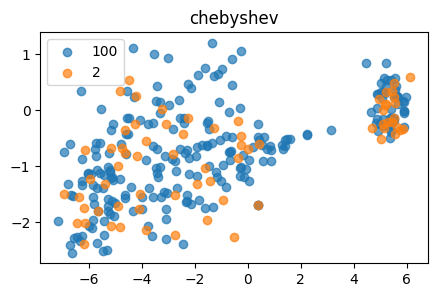

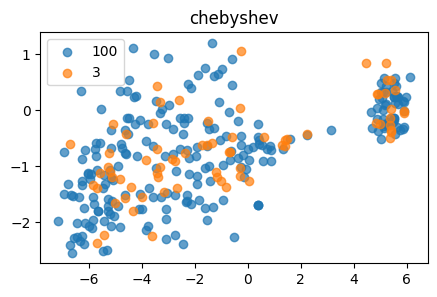

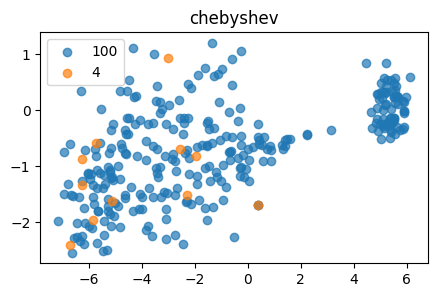

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


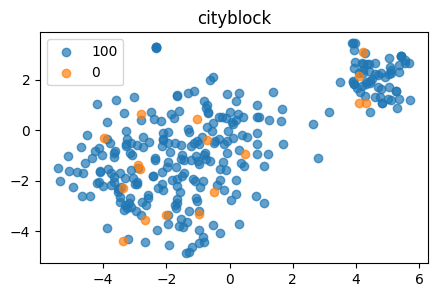

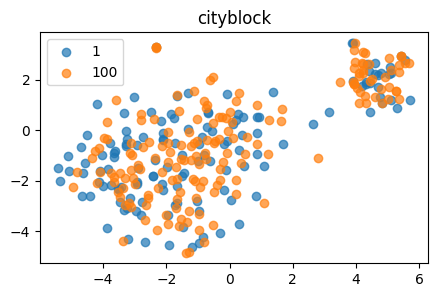

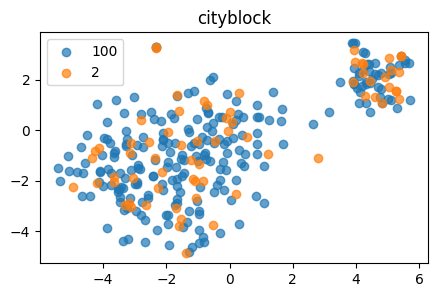

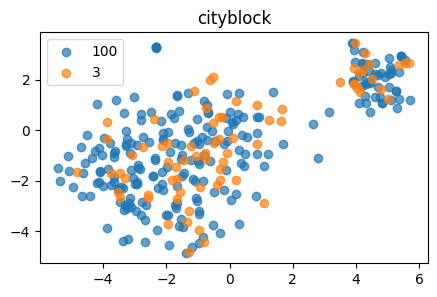

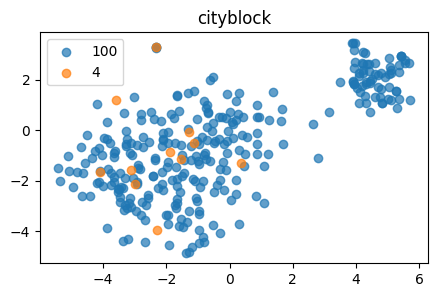

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


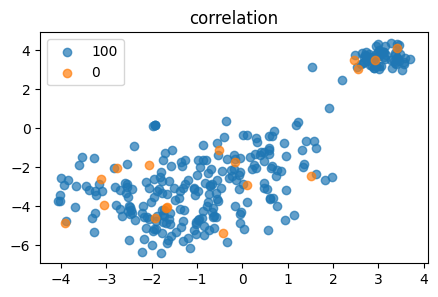

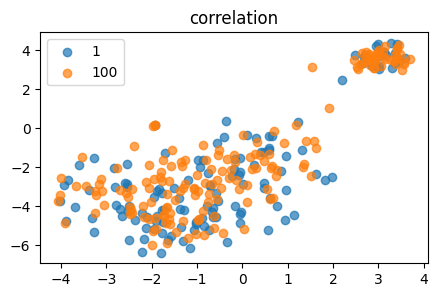

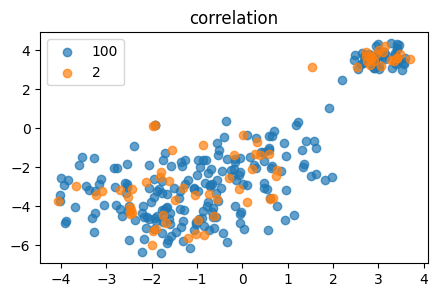

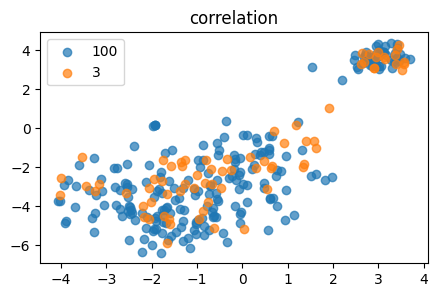

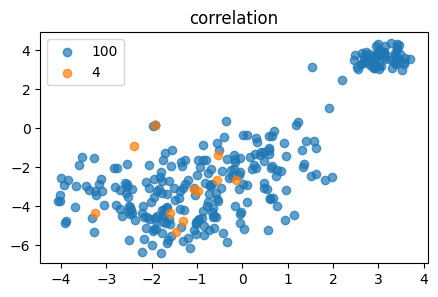

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


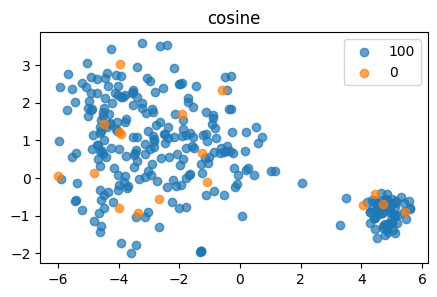

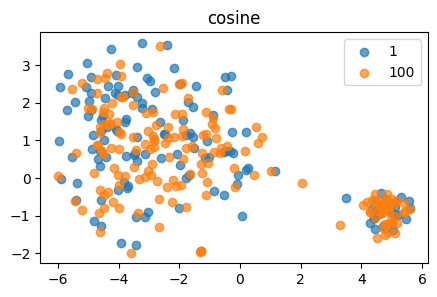

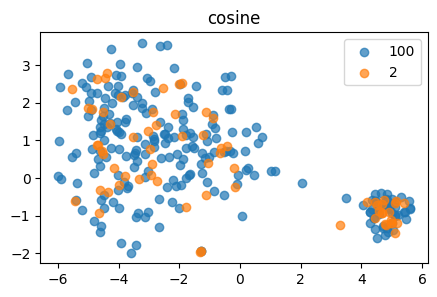

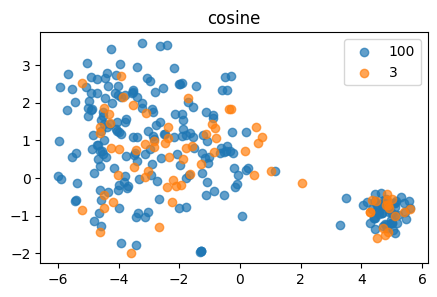

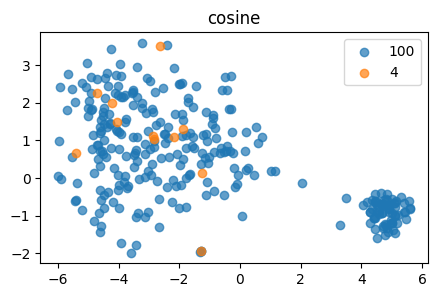

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


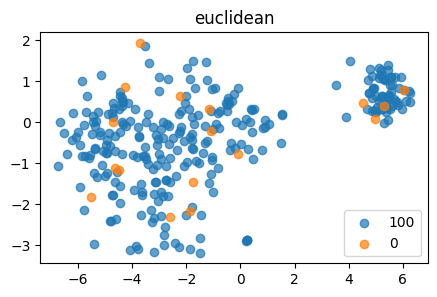

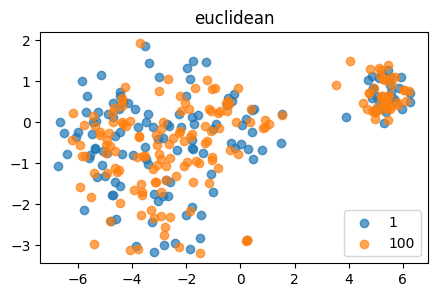

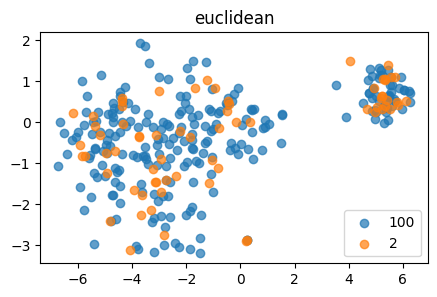

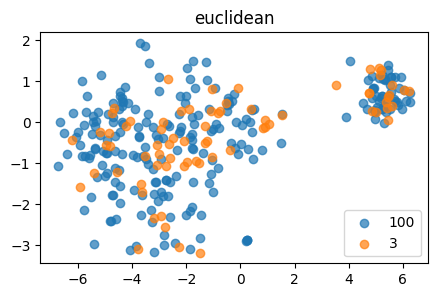

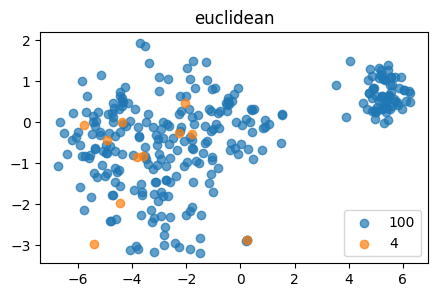

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


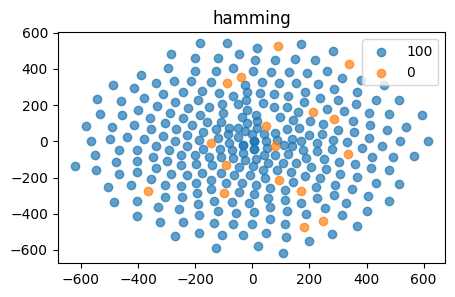

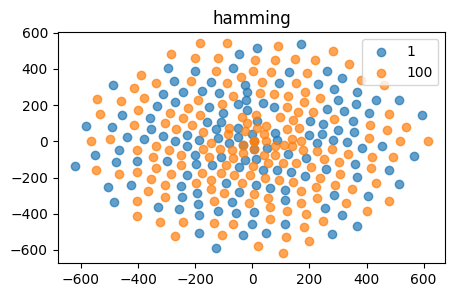

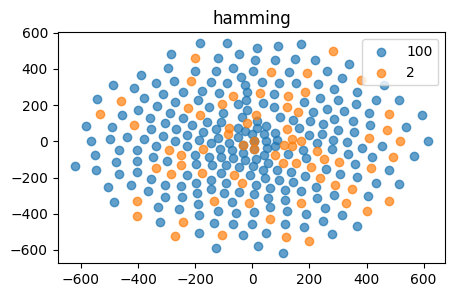

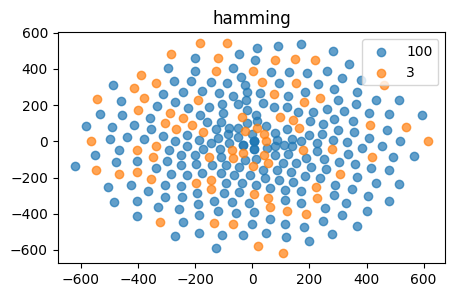

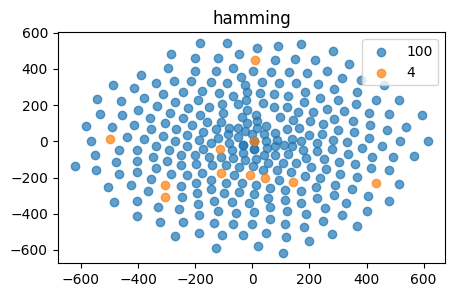

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


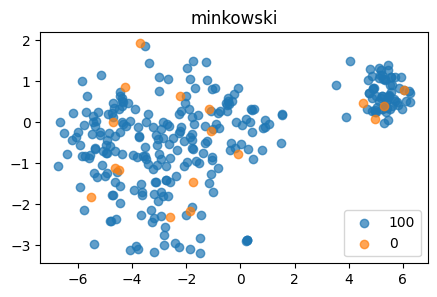

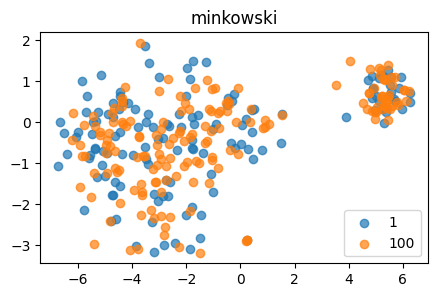

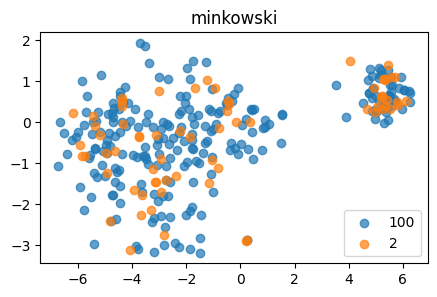

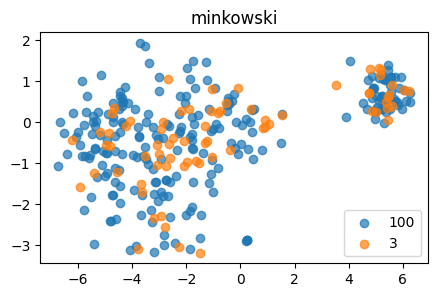

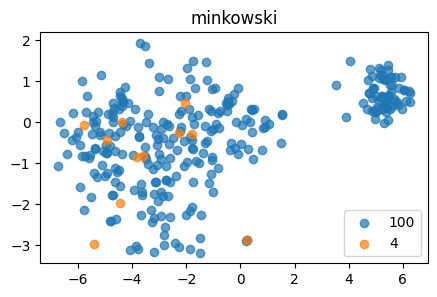

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


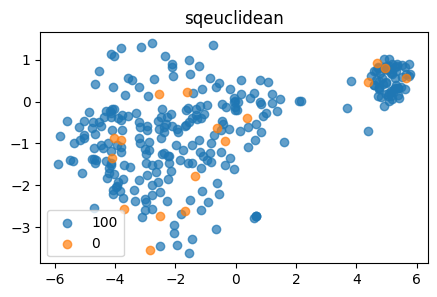

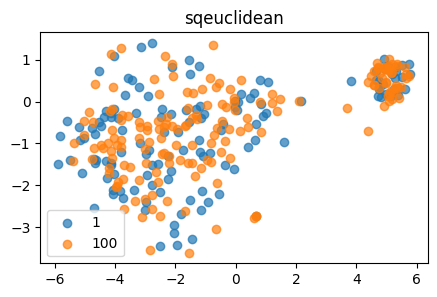

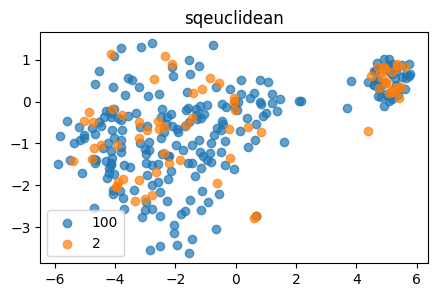

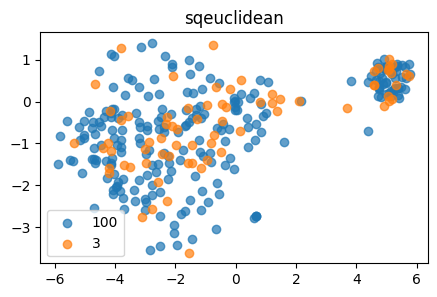

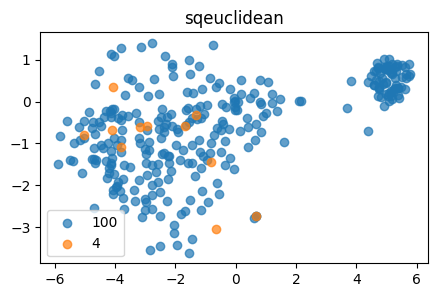

In [68]:
from sklearn.manifold import TSNE

try:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].to_list())
    tsne.fit_transform(embed)
except:
    tsne = TSNE(random_state = 42, n_iter = 250)
    embed = np.array(df['0embedding'].apply(lambda x: ast.literal_eval(x)).to_list())
    tsne.fit_transform(embed)
for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'minkowski', 'sqeuclidean']:
    tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric, early_exaggeration=20, perplexity=100)
    embeddings2d = tsne.fit_transform(embed)
    embeddingsdf = pd.DataFrame()
    embeddingsdf['x'] = embeddings2d[:,0]
    embeddingsdf['y'] = embeddings2d[:,1]
    
    for num_label in [0,1,2,3,4]:
        fig, ax = plt.subplots(figsize=(5, 3))
        embeddingsdf['label'] = [num_label if i==num_label else 100 for i in df['label']]
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()

In [74]:
embed

array([[ 0.80782551, -2.73058367, -0.21825282, ..., -0.58703804,
        -0.73817551,  2.7627573 ],
       [ 0.46295664, -3.25809312,  0.27425906, ..., -0.69837934,
        -0.55972385,  2.4770093 ],
       [ 1.31426013, -3.56537819,  0.75206357, ..., -0.93567002,
         0.32450822,  2.1888082 ],
       ...,
       [ 1.61587036, -2.30055714,  0.48862681, ..., -0.86885893,
        -0.30240899,  1.06108499],
       [ 0.12889624, -2.36802888,  0.70939541, ..., -1.07715738,
         0.32592541,  1.34845018],
       [ 0.06993094, -1.36807239,  0.22193228, ..., -0.60852236,
        -0.15620679,  2.56833553]])